# Principal Component Analysis (PCA) - Pokemon Unite

Author: Bruno Borges Dec, 2023 


### Context:

Pokemon Unite is a new MOBA(Multiplayer Online Battle Arena) released for Mobile and Nintendo Switch. The game became instantly popular after its initial release on Nintendo Switch but it has grown even more after being released on Mobile devices and even won game of the year on play store in US region and several other awards in different categories in several other regions in the annual Google Play Awards 2021.


### Goal:

Perform a cluster analysis using a dataframe from the Pokemon Unite game. The end goal is to explore different approaches such as Hierarchical and Non-Hierarchical clustering analysis. 


### Dataset:

The data is collected from the official Pokemon Unite website : https://unite.pokemon.com/en-us/ and processed and cleaned by [Shashanka Shekhar](https://www.kaggle.com/vishushekhar). It has all the information about every pokemon released in the game till Oct, 8th, 2023. 

* Name: Name of the Pokemon.
* Description: Description of the pokemon.
* Role: Role of the pokemon in the game.
* Ranged_or_Melee: Whether the attacks of the pokemon are ranged or close
* UsageDifficulty: How easy is to fully utilize the moves to make most out of the pokemon.
* Offense: Offense stat of the pokemon out of 5.0
* Endurance: Endurance stat of the pokemon out of 5.0
* Mobility: Mobility stat of the pokemon out of 5.0
* Scoring: Scoring stat of the pokemon out of 5.0
* Support: Support stat of the pokemon out of 5.0

## Importing packages

In [67]:
import pandas as pd
from factor_analyzer import FactorAnalyzer
from factor_analyzer.factor_analyzer import calculate_bartlett_sphericity
from factor_analyzer.factor_analyzer import calculate_kmo
import pingouin as pg
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

## Loading Data

In [68]:
#loading data from csv file
df_main = pd.read_csv("data-raw/PokemonUniteData.csv")

In [69]:
df_main.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 61 entries, 0 to 60
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             61 non-null     object 
 1   Description      61 non-null     object 
 2   Role             61 non-null     object 
 3   Ranged_or_Melee  61 non-null     object 
 4   UsageDifficulty  61 non-null     object 
 5   Offense          61 non-null     float64
 6   Endurance        61 non-null     float64
 7   Mobility         61 non-null     float64
 8   Scoring          61 non-null     float64
 9   Support          61 non-null     float64
dtypes: float64(5), object(5)
memory usage: 4.9+ KB


In [70]:
df_main.describe()

,Offense,Endurance,Mobility,Scoring,Support
count,61.000000,61.000000,61.000000,61.000000,61.000000
mean,3.311475,2.622951,2.639344,2.196721,1.852459
std,1.096068,0.942761,0.931536,0.708747,1.382462
min,1.000000,1.000000,1.000000,1.000000,0.500000
25%,2.500000,2.000000,2.000000,1.500000,0.500000
50%,3.500000,2.500000,2.500000,2.000000,1.500000
75%,4.000000,3.500000,3.000000,2.500000,3.000000
max,5.000000,5.000000,5.000000,4.000000,4.500000


## EDA

In [71]:
# skiping this phase for now

## Principal Component Analysis

#### Correlation Analysis

In [72]:
# separating only numerical variables
df_pca = df_main[['Offense', 'Endurance', 'Mobility', 'Scoring', 'Support']]
df_pca

,Offense,Endurance,Mobility,Scoring,Support
0,4.0,2.5,3.5,1.0,1.0
1,4.0,2.5,4.0,1.0,0.5
2,3.0,3.0,2.5,2.0,2.0
3,4.0,4.0,3.0,2.0,2.0
4,5.0,3.0,3.5,2.0,2.0
...,...,...,...,...,...
56,4.0,1.5,1.5,2.5,3.0
57,4.0,3.0,3.0,1.5,1.0
58,3.5,2.0,4.0,3.0,0.5
59,3.5,3.5,2.5,2.5,0.5


In [73]:
# correlation matrix
matriz_corr = pg.rcorr(
                    df_pca,
                    method = 'pearson',
                    upper = 'pval',
                    decimals = 4,
                    pval_stars = {0.01: '***', 0.05: '**', 0.10: '*'}
                )
print(matriz_corr)

           Offense Endurance Mobility Scoring Support
Offense          -       ***      ***             ***
Endurance   -0.453         -       **     ***      **
Mobility    0.3281   -0.2998        -             ***
Scoring      0.011    -0.386    0.185       -        
Support    -0.6209    0.2667  -0.6826  -0.191       -


c:\Users\bruno\AppData\Local\Programs\Python\Python312\Lib\site-packages\pingouin\correlation.py:1111: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  mat_upper = mat_upper.applymap(replace_pval)


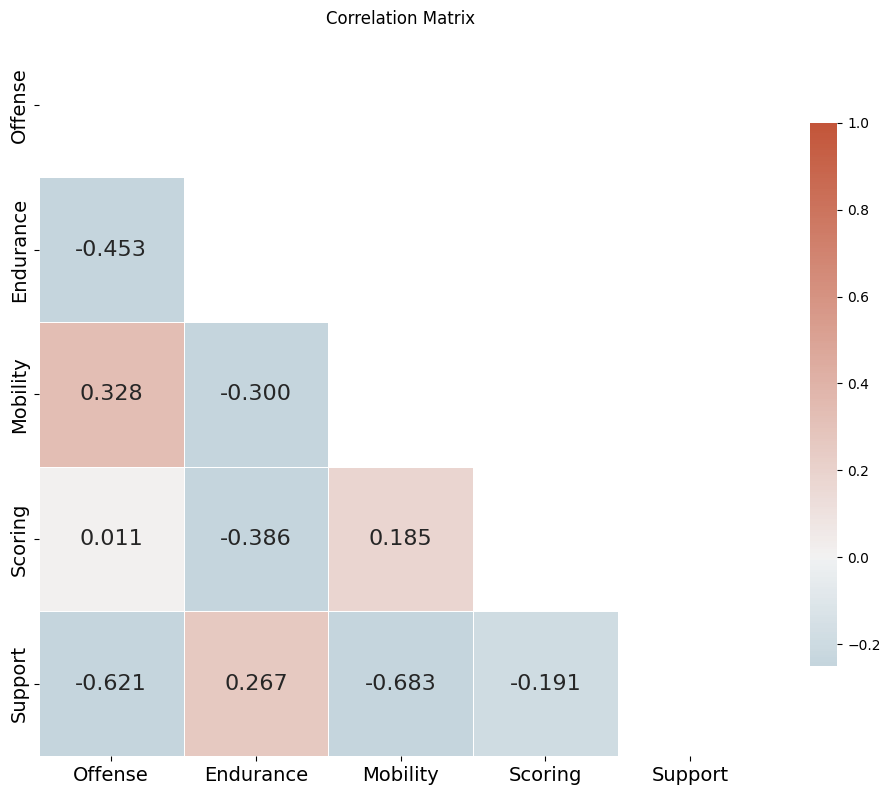

In [74]:
# plotting correlation matrix
corr = df_pca.corr()

f, ax = plt.subplots(figsize=(10, 8))

mask = np.triu(np.ones_like(corr, dtype=bool))

cmap = sns.diverging_palette(230, 20, n=256, as_cmap=True)

sns.heatmap(df_pca.corr(), 
            mask=mask, 
            cmap=cmap, 
            vmax=1, 
            vmin = -.25,
            center=0,
            square=True, 
            linewidths=.5,
            annot = True,
            fmt='.3f', 
            annot_kws={'size': 16},
            cbar_kws={"shrink": .75})

plt.title('Correlation Matrix')
plt.tight_layout()
ax.tick_params(axis = 'x', labelsize = 14)
ax.tick_params(axis = 'y', labelsize = 14)
ax.set_ylim(len(corr))

plt.show()

#### Statistics Tests

In [75]:
# Bartlett Sphericity
bartlett, p_value = calculate_bartlett_sphericity(df_pca)

print(f'Bartlett statistic: {bartlett}')

print(f'p-value : {p_value}')

Bartlett statistic: 98.9439493194566
p-value : 8.86407864274904e-17


In [76]:
# KMO Stats
kmo_all, kmo_model = calculate_kmo(df_pca)

print(f'kmo_model : {kmo_model}')



kmo_model : 0.48501094811477585


#### Pre-Modeling

In [77]:
# preliminary process
fa = FactorAnalyzer()
fa.fit(df_pca)

FactorAnalyzer(rotation_kwargs={})

In [78]:
# eigenvalues
ev, v = fa.get_eigenvalues()
print(ev)


[2.44374191 1.10019756 0.80779528 0.47471751 0.17354774]


In [79]:
# Kaiser criteria
fa.set_params(
    n_factors = 2,
    method = 'principal',
    rotation = None
)

fa.fit(df_pca)

FactorAnalyzer(method='principal', n_factors=2, rotation=None,
               rotation_kwargs={})

#### Eigenvalues, Loadings and Commonalities

In [80]:
# eigenvalues
eigen_factors = fa.get_factor_variance()

table_eigen = pd.DataFrame(eigen_factors)
table_eigen.columns = [f"Factor {i+1}" for i, v in enumerate(table_eigen.columns)]
table_eigen.index = ['Eigenvalue', 'Variance', 'Accumulated Variance']

table_eigen = table_eigen.T
print(table_eigen)

          Eigenvalue  Variance  Accumulated Variance
Factor 1    2.443742  0.488748              0.488748
Factor 2    1.100198  0.220040              0.708788


In [81]:
# factorials loadings
fa_loaginds = fa.loadings_

table_loadings = pd.DataFrame(fa_loaginds)
table_loadings.columns = [f"Factor {i+1}" for i, v in enumerate(table_loadings.columns)]
table_loadings.index = df_pca.columns

print(table_loadings)

           Factor 1  Factor 2
Offense    0.747650 -0.303627
Endurance -0.654271 -0.456997
Mobility   0.759169 -0.176965
Scoring    0.390754  0.822043
Support   -0.853032  0.303463


In [82]:
# commonalities
commonalities = fa.get_communalities()

table_commonalities = pd.DataFrame(commonalities)
table_commonalities.columns = ['Commonalities']
table_commonalities.index = df_pca.columns

print(table_commonalities)

           Commonalities
Offense         0.651169
Endurance       0.636918
Mobility        0.607655
Scoring         0.828444
Support         0.819754


#### Factorial Scores

In [83]:
# factorial score for each observation
predict_fator = pd.DataFrame(fa.transform(df_pca))
predict_fator.columns =  [f"Factor {i+1}" for i, v in enumerate(predict_fator.columns)]

# including to the main dataset 
df_main = pd.concat([df_main.reset_index(drop=True), predict_fator], axis=1)
df_main

,Name,Description,Role,Ranged_or_Melee,UsageDifficulty,Offense,Endurance,Mobility,Scoring,Support,Factor 1,Factor 2
0,Mimikyu,“Creep” it real with a Melee All-Rounder that’...,All-Rounder,Melee,Intermediate,4.0,2.5,3.5,1.0,1.0,0.463189,-1.713596
1,Blaziken,Get fired up with this Melee All-Rounder that ...,All-Rounder,Melee,Expert,4.0,2.5,4.0,1.0,0.5,0.758615,-1.901234
2,Mewtwo(Mewtwo),Showcase the awesome power of Mega Evolution a...,Attacker,Ranged,Novice,3.0,3.0,2.5,2.0,2.0,-0.324799,-0.243597
3,Mewtwo(Mega Mewtwo X),Showcase the awesome power of Mega Evolution a...,Attacker,Ranged,Novice,4.0,4.0,3.0,2.0,2.0,-0.161570,-1.028778
4,Mewtwo(Mega Mewtwo Y),Showcase the awesome power of Mega Evolution a...,Attacker,Ranged,Novice,5.0,3.0,3.5,2.0,2.0,0.574351,-0.925452
...,...,...,...,...,...,...,...,...,...,...,...,...
56,Alolan Ninetales,Alolan Ninetales uses moves that freeze its op...,Attacker,Ranged,Intermediate,4.0,1.5,1.5,2.5,3.0,-0.090945,1.075670
57,Cramorant,Cramorant is the Gulp Pokémon. Cramorant’s Abi...,Attacker,Ranged,Expert,4.0,3.0,3.0,1.5,1.0,0.265628,-1.317184
58,Gengar,"Gengar, a Pokémon that lurks in the shadows, i...",Speedster,Melee,Expert,3.5,2.0,4.0,3.0,0.5,1.216028,0.573776
59,Garchomp,"Garchomp’s Ability, Rough Skin, means it can s...",All-Rounder,Melee,Intermediate,3.5,3.5,2.5,2.5,0.5,0.168381,-0.362936


In [84]:
# factorial scores
scores = fa.weights_

table_scores = pd.DataFrame(scores)
table_scores.columns = [f"Factor {i+1}" for i, v in enumerate(table_scores.columns)]

table_scores.index = df_pca.columns
print(table_scores)

           Factor 1  Factor 2
Offense    0.305945 -0.275975
Endurance -0.267733 -0.415378
Mobility   0.310659 -0.160849
Scoring    0.159900  0.747178
Support   -0.349068  0.275826


In [85]:
# correlation between the factors
corr_fator = pg.rcorr(
                df_main[['Factor 1','Factor 2']],
                method = 'pearson',
                upper = 'pval',
                decimals = 4,
                pval_stars = {0.01: '***', 0.05: '**', 0.10: '*'}
            )

print(corr_fator)

         Factor 1 Factor 2
Factor 1        -         
Factor 2      0.0        -


c:\Users\bruno\AppData\Local\Programs\Python\Python312\Lib\site-packages\pingouin\correlation.py:1111: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  mat_upper = mat_upper.applymap(replace_pval)


In [90]:
# ranking the observations
df_main['Ranking'] = 0

for index, item in enumerate(list(table_eigen.index)):
    variance = table_eigen.loc[item]['Variance']
    df_main['Ranking'] = df_main['Ranking'] + df_main[table_eigen.index[index]] * variance
    
df_main


,Name,Description,Role,Ranged_or_Melee,UsageDifficulty,Offense,Endurance,Mobility,Scoring,Support,Factor 1,Factor 2,Ranking
0,Mimikyu,“Creep” it real with a Melee All-Rounder that’...,All-Rounder,Melee,Intermediate,4.0,2.5,3.5,1.0,1.0,0.463189,-1.713596,-0.150676
1,Blaziken,Get fired up with this Melee All-Rounder that ...,All-Rounder,Melee,Expert,4.0,2.5,4.0,1.0,0.5,0.758615,-1.901234,-0.047575
2,Mewtwo(Mewtwo),Showcase the awesome power of Mega Evolution a...,Attacker,Ranged,Novice,3.0,3.0,2.5,2.0,2.0,-0.324799,-0.243597,-0.212346
3,Mewtwo(Mega Mewtwo X),Showcase the awesome power of Mega Evolution a...,Attacker,Ranged,Novice,4.0,4.0,3.0,2.0,2.0,-0.161570,-1.028778,-0.305339
4,Mewtwo(Mega Mewtwo Y),Showcase the awesome power of Mega Evolution a...,Attacker,Ranged,Novice,5.0,3.0,3.5,2.0,2.0,0.574351,-0.925452,0.077077
...,...,...,...,...,...,...,...,...,...,...,...,...,...
56,Alolan Ninetales,Alolan Ninetales uses moves that freeze its op...,Attacker,Ranged,Intermediate,4.0,1.5,1.5,2.5,3.0,-0.090945,1.075670,0.192241
57,Cramorant,Cramorant is the Gulp Pokémon. Cramorant’s Abi...,Attacker,Ranged,Expert,4.0,3.0,3.0,1.5,1.0,0.265628,-1.317184,-0.160007
58,Gengar,"Gengar, a Pokémon that lurks in the shadows, i...",Speedster,Melee,Expert,3.5,2.0,4.0,3.0,0.5,1.216028,0.573776,0.720585
59,Garchomp,"Garchomp’s Ability, Rough Skin, means it can s...",All-Rounder,Melee,Intermediate,3.5,3.5,2.5,2.5,0.5,0.168381,-0.362936,0.002436


#### Results

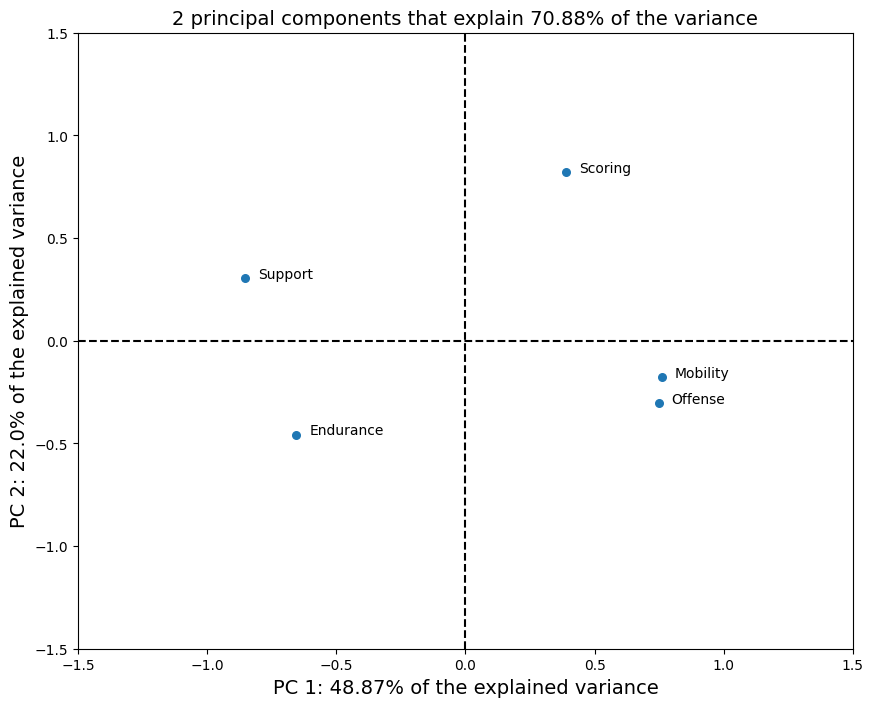

In [95]:
# factorial loadings plot

plt.figure(figsize=(10,8))

table_loadings_chart = table_loadings.reset_index()

plt.scatter(table_loadings_chart['Factor 1'], table_loadings_chart['Factor 2'], s=30)

def label_point(x, y, val, ax):
    a = pd.concat({'x': x, 'y': y, 'val': val}, axis=1)
    for i, point in a.iterrows():
        ax.text(point['x'] + 0.05, point['y'], point['val'])

label_point(x = table_loadings_chart['Factor 1'],
            y = table_loadings_chart['Factor 2'],
            val = table_loadings_chart['index'],
            ax = plt.gca()) 

plt.axhline(y=0, color='black', ls='--')
plt.axvline(x=0, color='black', ls='--')
plt.ylim([-1.5,1.5])
plt.xlim([-1.5,1.5])
plt.title(f"{table_eigen.shape[0]} principal components that explain {round(table_eigen['Variance'].sum()*100,2)}% of the variance", fontsize=14)
plt.xlabel(f"PC 1: {round(table_eigen.iloc[0]['Variance']*100,2)}% of the explained variance", fontsize=14)
plt.ylabel(f"PC 2: {round(table_eigen.iloc[1]['Variance']*100,2)}% of the explained variance", fontsize=14)
plt.show()

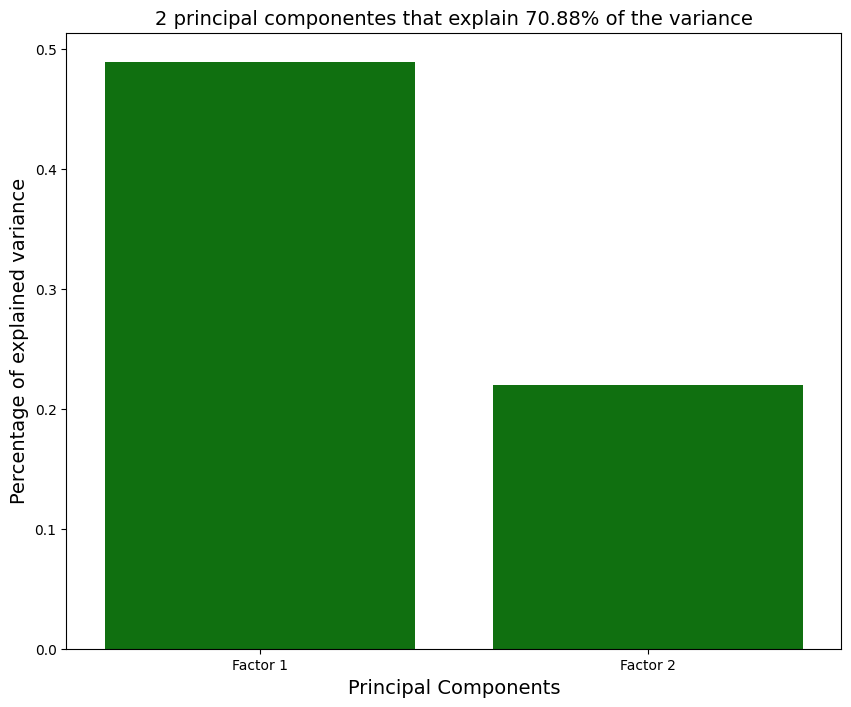

In [96]:
# acummulated variance
plt.figure(figsize=(10,8))

plt.title(f"{table_eigen.shape[0]} principal componentes that explain {round(table_eigen['Variance'].sum()*100,2)}% of the variance", fontsize=14)
sns.barplot(x=table_eigen.index, y=table_eigen['Variance'], data=table_eigen, color='green')
plt.xlabel("Principal Components", fontsize=14)
plt.ylabel("Percentage of explained variance", fontsize=14)

plt.show()